In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Imputer
import re
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
import matplotlib.pyplot as plt

In [2]:
test_data = pd.read_csv('Predicting-House-Prices-In-Bengaluru-Test-Data.csv')
train_data = pd.read_csv('Predicting-House-Prices-In-Bengaluru-Train-Data.csv')

In [3]:
train_data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
train_data =train_data.dropna(subset=['location'])

In [5]:
train_data.describe()

,bath,balcony,price
count,13246.000000,12710.000000,13319.000000
mean,2.692586,1.584343,112.567621
std,1.341506,0.817287,148.977089
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
train_data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

C:\Users\NITIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 4.41 and sigma = 0.71



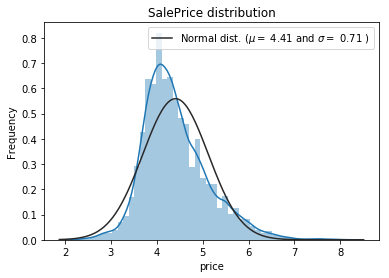

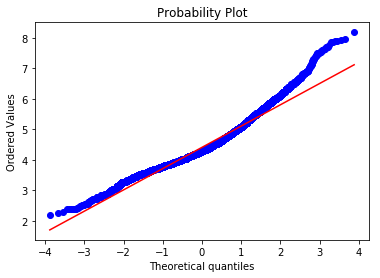

Skewness: 0.856272
Kurtosis: 1.347649


In [7]:
# Plot Histogram
train_data['price'] =np.log1p(train_data['price'])
sns.distplot(train_data['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data['price'], plot=plt)
plt.show()

print("Skewness: %f" %train_data['price'].skew())
print("Kurtosis: %f" % train_data['price'].kurt())

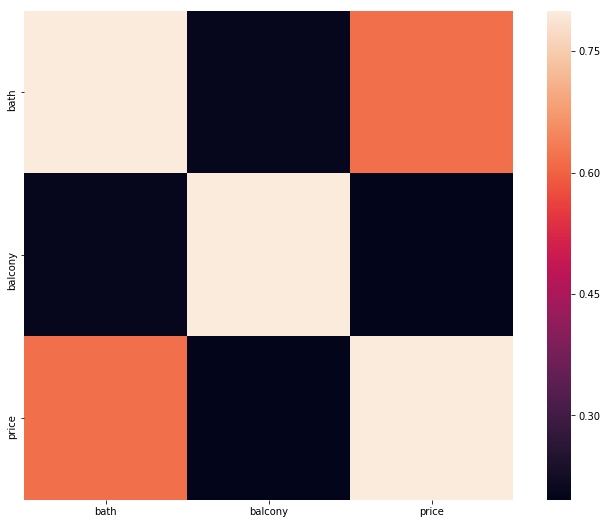

In [8]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

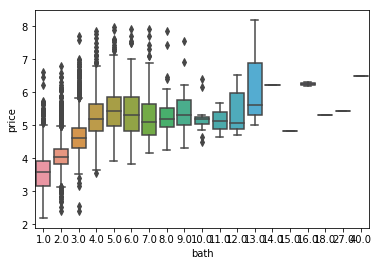

In [9]:
#fig, axs = plt.subplots(figsize=(30, 10),ncols=2)
sns.boxplot(x=train_data['bath'], y=train_data['price'])

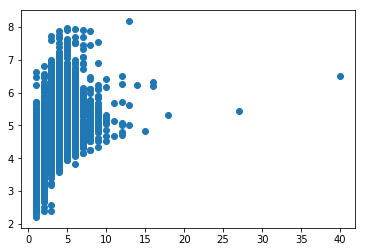

In [10]:
plt.scatter(x= train_data['bath'],y=train_data['price'])


C:\Users\NITIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\NITIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


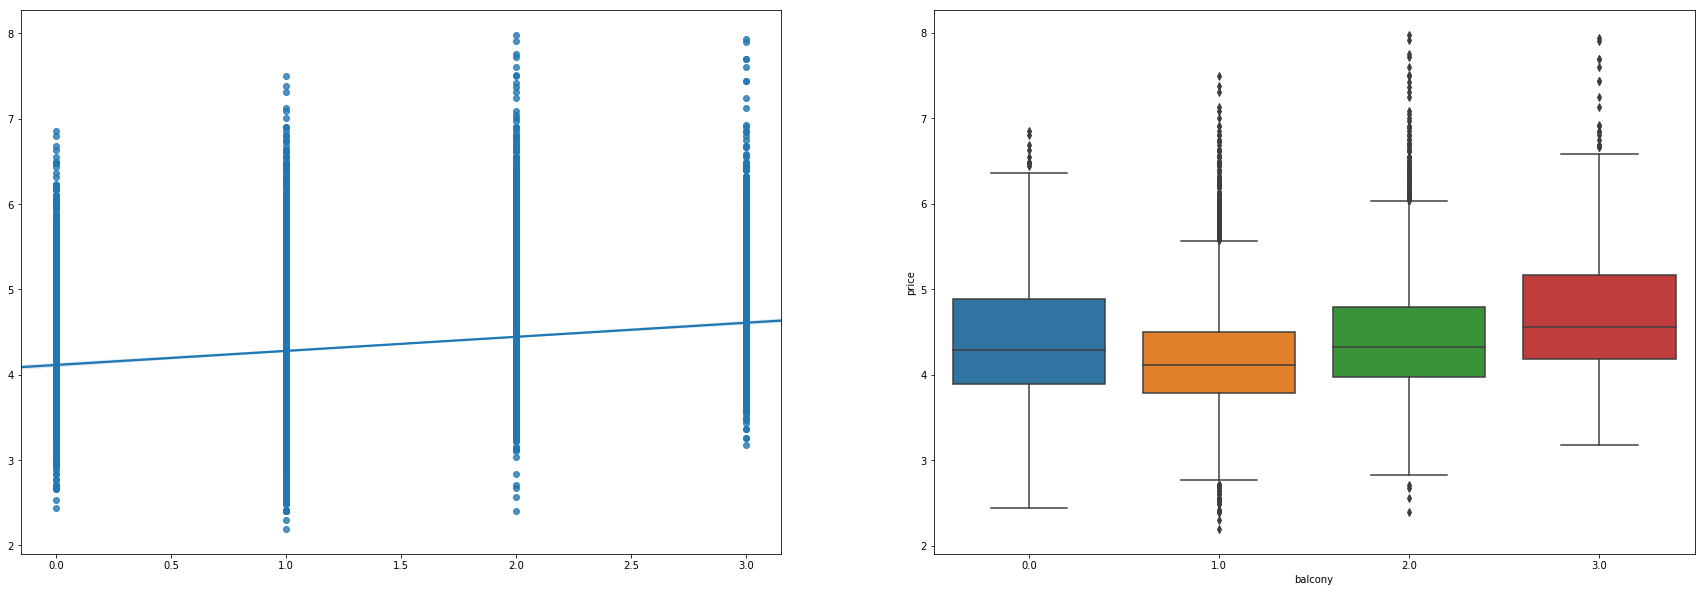

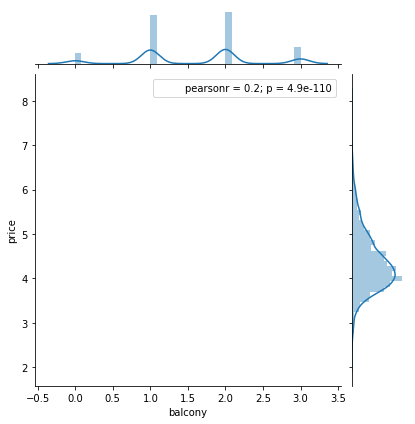

In [11]:
fig, axs = plt.subplots(figsize=(30, 10),ncols=2)
sns.jointplot(x=train_data['balcony'], y=train_data['price'], kind='reg', ax = axs[0])
sns.boxplot(x=train_data['balcony'], y=train_data['price'] ,ax =axs[1])

In [12]:
train_data = train_data.drop(train_data[(train_data['bath']>=25) 
                         & (train_data['price']<1000)].index).reset_index(drop=True)

## Combining Datasets

In [13]:
# Combining Datasets
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
y_train = train_data.price
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("Train data size is : {}".format(train_data.shape))
print("Test data size is : {}".format(test_data.shape))
print("Combined dataset size is : {}".format(all_data.shape))
print(train_data['price'].isnull().sum())

Train data size is : (13317, 9)
Test data size is : (1480, 9)
Combined dataset size is : (14797, 8)
0


In [14]:
# Find Missing Ratio of Dataset
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
society,41.400284
balcony,4.582010
bath,0.540650
size,0.121646


In [15]:
all_data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
dtype: object

## Features Encoding

In [16]:
lb = LabelEncoder()
all_data['area_type'].unique()
dict_value = {'Super built-up  Area' : 1.8, 'Plot  Area' : 5, 'Built-up  Area' : 1.15,'Carpet  Area' : 1}
all_data['area_type'].replace(dict_value,inplace =True)

In [17]:
all_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '10 Bedroom', '11 Bedroom', '10 BHK',
       '19 BHK', '16 BHK', '14 BHK', '8 BHK', '12 Bedroom', '13 BHK',
       '18 Bedroom', '16 Bedroom'], dtype=object)

In [18]:
all_data['size'] = all_data['size'].replace('1 RK','0')
all_data['size'] = all_data['size'].str.extract('([0-9]*[.]?[0-9]+)',expand= False)
all_data['size'] = all_data['size'].astype("float64")
all_data['size'] = all_data['size'].fillna(all_data['size'].mode()[0])

In [19]:
#X['total_sqft'].applymap(lambda x: isinstance(x, (int, floatset())))
area_types = all_data['total_sqft'].str.extract('([0-9.]*)([.A-Z a-z]*)',expand= False)
#print(set(area_types[1]))
area_range = all_data['total_sqft'].str.extract('([0-9 ]*-[ 0-9]*)',expand= False)
#print(set(area_range))
dict_size ={}
dict_size['Guntha'] = 1089.0
dict_size['Sq. Meter'] = 10.7639
dict_size['Acres'] = 43560.0
dict_size['Sq. Yards'] = 9.0
dict_size['Perch'] = 272.25
dict_size['Cents'] = 435.61
dict_size['Grounds'] = 2400.0

for key,values in dict_size.items():
    for index,value in all_data['total_sqft'].iteritems():
        if key in value:
            val = float(re.findall("\d*\.\d+|\d+",value)[0])
            #print(X['total_sqft'][index], val,key)
            all_data.loc[index,'total_sqft'] = str(val*values)
            #X['total_sqft'][index] = str(val*values)
            #print(X['total_sqft'][index])
        if '-' in value:
            lst = list(map(float,value.split("-")))
            all_data.loc[index,'total_sqft'] = str((lst[0] + lst[1]) /2)
all_data['total_sqft'] = all_data['total_sqft'].astype('float64')

In [20]:
all_data['society'].fillna("No", inplace =True)

In [21]:
available_features_society = all_data['society'].str.extract(r'(0{4})', expand = False)
all_data['is_society'] = available_features_society.fillna(0)

In [22]:
all_data['bath'].fillna(all_data['bath'].mode()[0], inplace =True)
all_data['balcony'].fillna(all_data['balcony'].mode()[0], inplace =True)

In [23]:
all_data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
is_society      0
dtype: int64

In [24]:
all_data.dtypes

area_type       float64
availability     object
location         object
size            float64
society          object
total_sqft      float64
bath            float64
balcony         float64
is_society        int64
dtype: object

In [25]:
from scipy.stats import pearsonr
value = all_data.dropna()
pearsonr(value['size'],value['bath'])

(0.8861596775737759, 0.0)

In [26]:
all_data['isready']= all_data['availability'].str.extract(r'([A-Za-z ]{13,})', expand = False)

In [27]:
all_data['isready'].unique()
dict_value = {'Ready To Move' : 2, 'Immediate Possession' : 1}
all_data['isready'].replace(dict_value,inplace =True)
all_data['isready'].fillna(0, inplace = True)

In [28]:
all_data['availability'] = all_data['availability'].replace(['Ready To Move', 'Immediate Possession'],0)

In [29]:
all_data = all_data.drop(['availability'],axis=1)

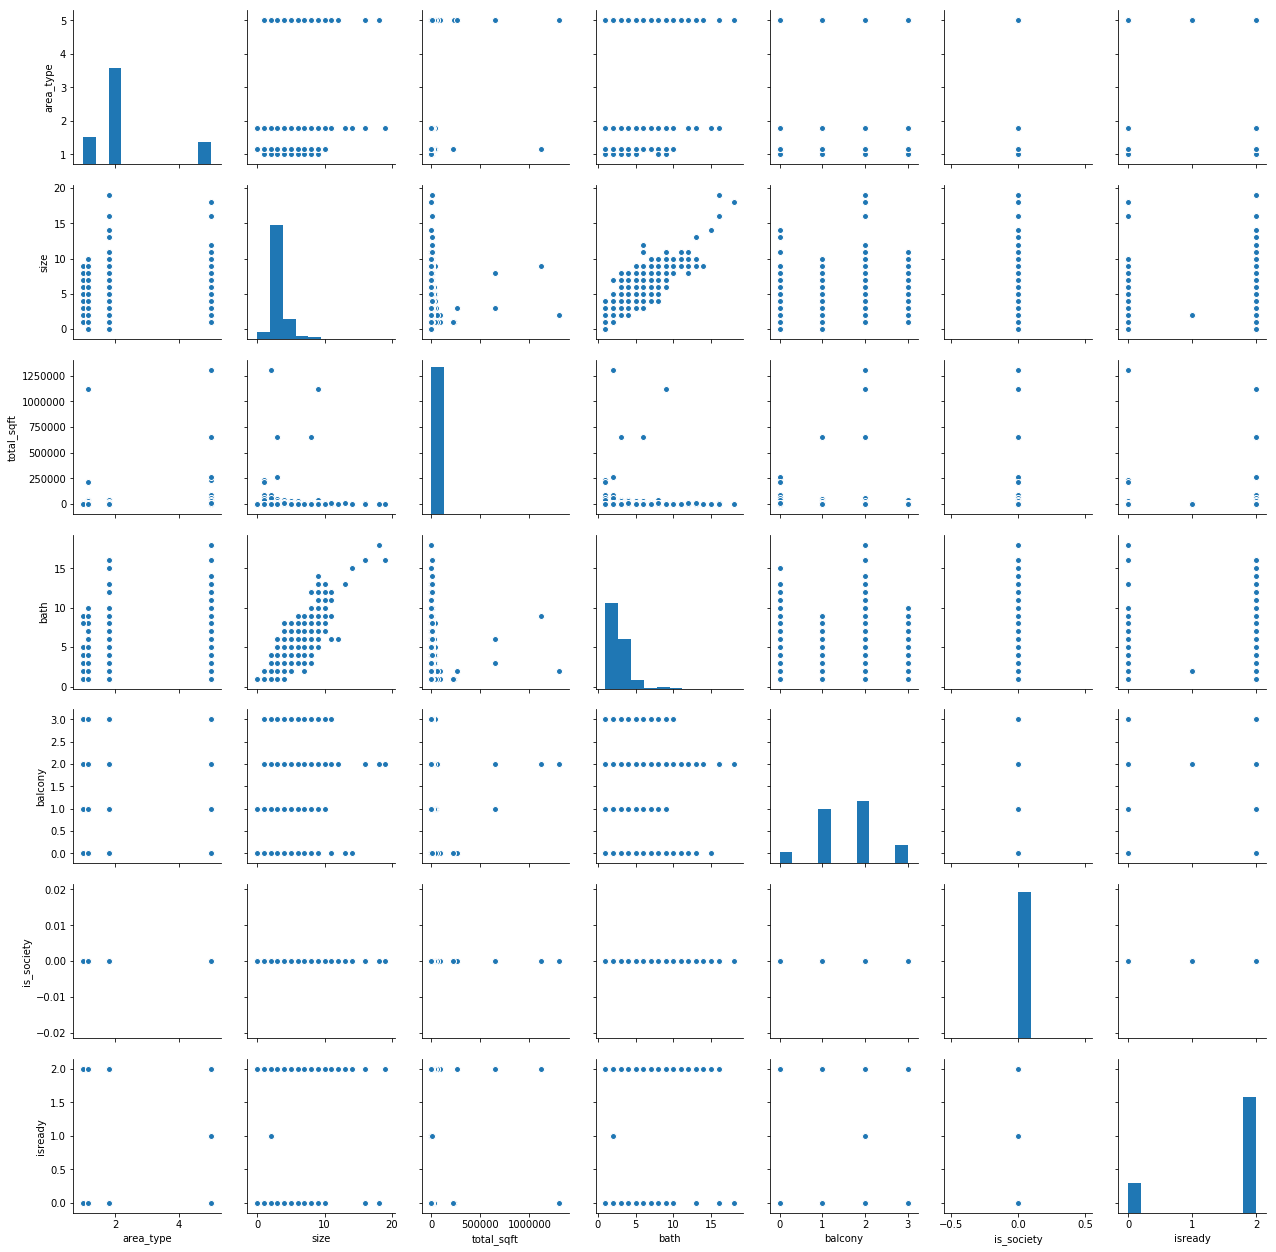

In [30]:
#plt.scatter(numeric_dataset['bath'],numeric_dataset['size'])
#numeric_dataset = numeric_dataset.drop(['bath'],axis=1)
sns.pairplot(all_data)


In [31]:
all_data = all_data.drop(['bath'],axis =1)

In [32]:
from category_encoders import *
enc = BinaryEncoder(cols=['location', 'society']).fit(all_data,y_train)

# transform the dataset
all_data = enc.transform(all_data)

## Outlier Removal

In [33]:
train = all_data[:ntrain]
train = train.assign(price = y_train)
test = all_data[ntrain:]
print(train.shape,test.shape)
train.head()

(13317, 32) (1480, 31)


,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,...,society_10,society_11,society_12,area_type,size,total_sqft,balcony,is_society,isready,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1.80,2.0,1056.0,1.0,0,0.0,3.690628
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,5.00,4.0,2600.0,3.0,0,2.0,4.795791
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1.15,3.0,1440.0,3.0,0,2.0,4.143135
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1.80,3.0,1521.0,1.0,0,2.0,4.564348
4,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1.80,2.0,1200.0,1.0,0,2.0,3.951244


### Continuous Variable

C:\Users\NITIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\NITIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


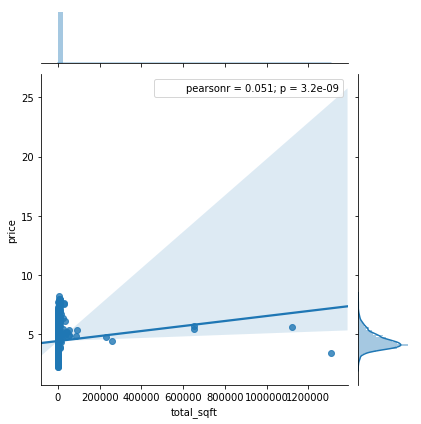

In [34]:
sns.jointplot(x=train['total_sqft'], y=train['price'], kind = "reg")


In [35]:
train[train['total_sqft']>= 20000]

,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,...,society_10,society_11,society_12,area_type,size,total_sqft,balcony,is_society,isready,price
647,0,0,0,1,0,0,0,1,0,1,...,0,1,1,1.15,9.0,1123031.250,2.0,0,2.0,5.583496
673,0,0,0,0,0,0,0,1,1,0,...,1,1,1,1.15,3.0,35000.000,3.0,0,2.0,4.875197
1018,0,0,0,1,1,0,0,0,1,1,...,0,1,1,5.00,1.0,231303.600,0.0,0,0.0,4.709530
1085,0,0,0,1,1,0,0,1,1,1,...,0,1,1,5.00,2.0,1306800.000,2.0,0,0.0,3.417727
1892,0,0,1,0,0,0,1,1,1,0,...,0,1,1,5.00,3.0,52272.000,1.0,0,2.0,4.948760
2621,0,0,1,0,1,0,0,1,1,0,...,0,1,1,5.00,4.0,30000.000,2.0,0,0.0,7.650169
3226,0,0,1,0,1,1,0,1,0,1,...,0,1,1,1.15,5.0,32722.256,1.0,0,2.0,4.948760
5390,0,0,1,0,0,1,0,0,0,1,...,0,1,1,1.80,9.0,42000.000,3.0,0,2.0,5.170484
5466,0,0,0,0,1,0,1,1,1,1,...,1,1,0,1.80,4.0,36000.000,2.0,0,2.0,6.111467
6330,0,0,1,1,1,1,0,1,0,1,...,0,1,1,5.00,2.0,91040.400,0.0,0,2.0,5.303305


In [36]:
train = train.drop(train[(train['total_sqft']>=20000) 
                         & (train['price']<=1000)].index).reset_index(drop=True)

C:\Users\NITIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


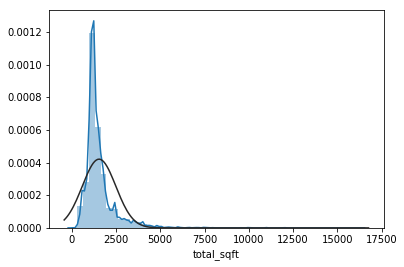

In [37]:
sns.distplot(train['total_sqft'], fit = norm)

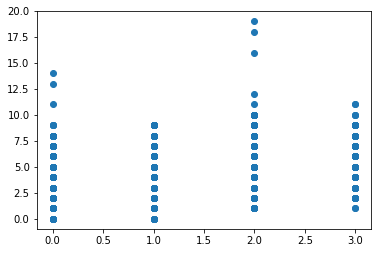

In [38]:
plt.scatter(train['balcony'] ,train['size'])

In [39]:
corr_matrix = train.corr()
corr_matrix

,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,...,society_10,society_11,society_12,area_type,size,total_sqft,balcony,is_society,isready,price
location_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_1,NaN,1.000000,-0.062255,-0.061500,0.034532,0.032336,-0.000776,0.000394,0.003610,0.007424,...,-0.073131,0.067100,0.061425,0.067355,0.047112,0.025281,-0.025274,NaN,0.019483,0.027833
location_2,NaN,-0.062255,1.000000,0.131394,0.067071,0.070508,0.057630,0.012774,0.010540,0.010661,...,-0.097441,0.103889,0.073158,0.115994,0.076477,0.011752,0.002528,NaN,0.073039,0.080074
location_3,NaN,-0.061500,0.131394,1.000000,0.089917,0.121422,0.091171,-0.016986,0.024086,0.008881,...,-0.080677,0.101673,0.100139,0.091059,0.071303,0.025691,-0.000924,NaN,0.091932,0.062189
location_4,NaN,0.034532,0.067071,0.089917,1.000000,0.173845,0.111465,-0.026106,0.032889,-0.036483,...,-0.059283,0.080419,0.035157,0.059984,0.052344,0.018465,0.012870,NaN,0.070902,0.062761
location_5,NaN,0.032336,0.070508,0.121422,0.173845,1.000000,0.033779,0.034677,0.001499,-0.051665,...,-0.082577,0.063731,0.022860,0.047103,0.029157,-0.008929,0.016144,NaN,0.078490,0.024898
location_6,NaN,-0.000776,0.057630,0.091171,0.111465,0.033779,1.000000,-0.070095,-0.097073,0.055094,...,-0.008186,0.018456,0.036388,0.028111,0.036122,0.005691,0.008942,NaN,0.042527,0.046406
location_7,NaN,0.000394,0.012774,-0.016986,-0.026106,0.034677,-0.070095,1.000000,0.047098,0.039272,...,-0.023122,-0.009679,0.033254,-0.021865,0.004510,-0.012865,0.010143,NaN,0.010479,-0.011023
location_8,NaN,0.003610,0.010540,0.024086,0.032889,0.001499,-0.097073,0.047098,1.000000,-0.059021,...,-0.012452,0.012018,0.003034,-0.001986,-0.014827,-0.021211,-0.045602,NaN,-0.040149,-0.004905
location_9,NaN,0.007424,0.010661,0.008881,-0.036483,-0.051665,0.055094,0.039272,-0.059021,1.000000,...,0.020569,-0.016536,-0.002252,0.032325,0.015136,0.009610,0.003416,NaN,-0.034785,0.029250


In [40]:
train = train.drop(['location_0','society_0','is_society'],axis =1)
test = test.drop(['location_0','society_0','is_society'],axis =1)


### Categorical Variable

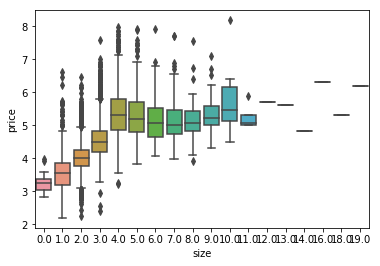

In [41]:
sns.boxplot(train['size'], train['price'])

C:\Users\NITIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 1.68 and sigma = 0.13



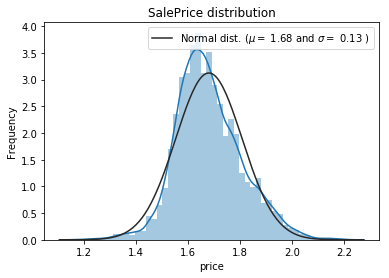

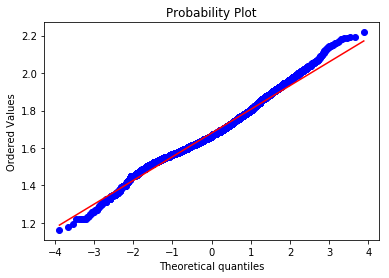

Skewness: 0.375336
Kurtosis: 0.635366


In [42]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["price"] = np.log1p(train["price"]) 


# Plot Histogram
sns.distplot(train['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

print("Skewness: %f" %train['price'].skew())
print("Kurtosis: %f" % train['price'].kurt())

In [43]:
# Combining Datasets
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.price
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
print("Combined dataset size is : {}".format(all_data.shape))


Train data size is : (13295, 29)
Test data size is : (1480, 28)
Combined dataset size is : (14775, 28)


C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


In [44]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
total_sqft,84.755396
location_1,5.418702
society_1,3.554948
size,2.451488
location_2,2.346651


In [45]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0
for feat in skewed_features:
    all_data.loc[:,feat] = boxcox1p(all_data[feat], lam)
    #train.loc[:,feat] += 1


There are 28 skewed numerical features to Box Cox transform


In [46]:
all_data = pd.get_dummies(all_data,drop_first=True)
print(all_data.shape)

(14775, 28)


In [49]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train = sc.fit_transform(train)
test = sc.transform(test)


## Modelling

In [50]:
test.shape

(1480, 28)

### Import Libraries

In [51]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [52]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = kf, n_jobs=7))
    return(rmse)

In [53]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [54]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0739 (0.0033)



In [55]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0739 (0.0033)



In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("KernelRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [56]:
randomForest = RandomForestRegressor()
score = rmsle_cv(randomForest)
print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Random Forest score: 0.0606 (0.0023)



In [64]:
## Best Score till now
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0565 (0.0027)



In [53]:
## Best Score till now
GBoost = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=9,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=2500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
score = rmsle_cv(GBoost)

#Gradient Boosting score: 0.05204824 (0.00266743)

print("Gradient Boosting score: {:.8f} ({:.8f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.05194865 (0.00284355)



In [58]:
new_lgb = lgb.LGBMRegressor()
score = rmsle_cv(new_lgb)
print("Light Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Light Gradient Boosting score: 0.0581 (0.0026)



In [65]:
new_lgb = lgb.LGBMRegressor(learning_rate=0.07,n_estimators=2000)
score = rmsle_cv(new_lgb)
print("Light Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Light Gradient Boosting score: 0.0547 (0.0026)



In [59]:
model_lgb = xgb.XGBRegressor()
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.0637 (0.0028)



In [ ]:
train.columns

In [66]:
GBoost.fit(train, y_train)
xgb_train_pred = GBoost.predict(train)
xgb_pred = np.expm1(GBoost.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.04681226625221903


In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [ ]:
averaged_models = AveragingModels(models = (model_xgb, GBoost, model_lgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
averaged_models.fit(train, y_train)
stacked_train_pred = averaged_models.predict(train)
stacked_pred = np.expm1(averaged_models.predict(test))
print(rmsle(y_train, stacked_train_pred))

In [ ]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(y_train, lgb_train_pred))

In [ ]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15


In [ ]:
ensemble

In [ ]:
test.shape

In [67]:
test_data['price'] = np.exp(xgb_pred)

In [68]:
test_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,68.221604
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,324.386035
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,258.222359
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,65.899385
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,56.874412


In [69]:
writer = pd.ExcelWriter('test_6.xlsx')
test_data.to_excel(writer,'Predicting-House-Prices-In')
writer.save()